# 👩‍💻 Multimodal Deep Learning Challenge: Image & Text Classification in PyTorch
## 📋 Overview
In this capstone project, you'll demonstrate your ability to design, train, and optimize deep learning models using PyTorch. This project integrates multiple components from the course—including CNNs for image classification, LSTMs for sequence modeling, and advanced training techniques for stability and efficiency.
 
You will complete two distinct tasks, simulating real-world projects in computer vision and NLP, then apply training optimization strategies to improve model performance. This lab serves as a portfolio-quality artifact to showcase your end-to-end deep learning skills.
- This project integrates CNNs, LSTMs, and model optimization techniques using PyTorch
- You'll work with FashionMNIST and IMDB review datasets
- Final outputs will include trained models, evaluation metrics, and insights on optimization effectiveness


## 🎯 Learning Outcomes
By the end of this lab, you will be able to:
- Design and train convolutional neural networks (CNNs) for image classification
- Build and train LSTM-based models for sequence classification tasks
- Apply advanced training techniques like mixed precision and gradient clipping
- Analyze and compare model performance using evaluation metrics and visualizations
- Interpret results and recommend training strategies

## 💡 Task 1: Image Classification with a Custom CNN
In this task, you'll implement a full training pipeline for a CNN using the FashionMNIST dataset.

**Steps:**
1. Load the FashionMNIST dataset using torchvision, with normalization.
2. Define a custom CNN model with:
    - Two convolutional layers
    - ReLU activations and max pooling
    - Dropout layer
    - Two fully connected layers
3. Define a training loop using:
    - CrossEntropyLoss
    - Adam optimizer
    - Train for at least 3 epochs
4. Track and store training loss per epoch in a list named `train_losses`.
5. Plot the training loss after training.

In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [2]:
# Define model
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # 28x28 -> 28x28
        self.pool = nn.MaxPool2d(2, 2)  # 28x28 -> 14x14
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # 14x14 -> 14x14
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # after pooling twice
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.dropout(x)
        x = x.view(x.size(0), -1)  # flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = CustomCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Grading of Lab Assignments:
The grading of this assignment is based on the test cases throughout this notebook within the `# BEGIN TESTS` and `#END TESTS` comments. 

Each task has a number of test cells. For example, the three cells below are confirming the model has been defined and named `model` as expected, containing two convolutional layers and a dropout layer.

Run all of these test cells throughout the project to confirm you pass the tests and are on the right track. Once you have passed all the tests in the entire notebook, or are happy with your results you can click the `Submit Assignment` button in the top right corner for your final submission and grading. 

Good luck!

In [3]:
# BEGIN TESTS
assert isinstance(model, nn.Module), "model should be an instance of nn.Module"
print("✅ TEST PASSED!")
# END TESTS

# Note: There may be hidden tests that learners cannot see, as to not give away the full solution.

✅ TEST PASSED!


In [4]:
# BEGIN TEST
conv_layers = [m for m in model.modules() if isinstance(m, nn.Conv2d)]
assert len(conv_layers) == 2, "Model must include two nn.Conv2d layers"
print("✅ TEST PASSED!")
# END TEST

# Note: There may be hidden tests that learners cannot see, as to not give away the full solution.

✅ TEST PASSED!


In [5]:
# BEGIN TEST
assert isinstance(model.dropout, nn.Dropout), "Dropout should be nn.Dropout"
print("✅ TEST PASSED!")
# END TESTS

# Note: There may be hidden tests that learners cannot see, as to not give away the full solution.

✅ TEST PASSED!


In [6]:
# Training loop
train_losses = []
num_epochs = 3

for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()  # set model to training mode
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward + optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
    # Average loss per epoch
    epoch_loss = running_loss / len(trainloader)
    train_losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

Epoch [1/3], Loss: 0.4471
Epoch [2/3], Loss: 0.2944
Epoch [3/3], Loss: 0.2507


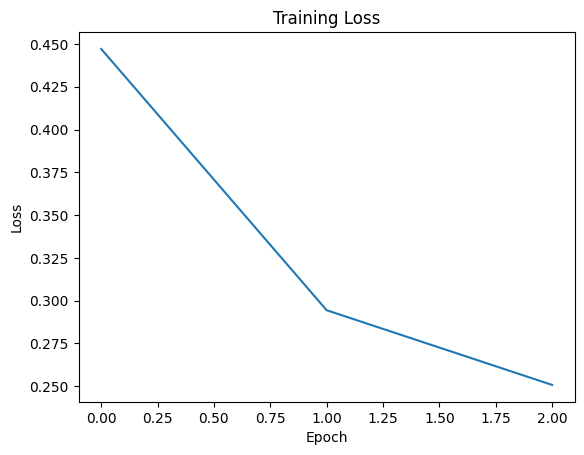

In [7]:
# Plot loss
plt.plot(train_losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [8]:
# BEGIN TESTS
assert isinstance(train_losses, list), "train_losses should be a list"
print("✅ TEST PASSED!")
# END TESTS

# Note: There may be hidden tests that learners cannot see, as to not give away the full solution.

✅ TEST PASSED!


In [9]:
# BEGIN TESTS
assert len(train_losses) >= 3, "Should track loss for at least 3 epochs"
print("✅ TEST PASSED!")
# END TESTS

# Note: There may be hidden tests that learners cannot see, as to not give away the full solution.

✅ TEST PASSED!


In [10]:
# BEGIN TESTS
assert train_losses[-1] < train_losses[0] or abs(train_losses[-1] - train_losses[0]) < 0.1, "Training loss should generally decrease"
print("✅ TEST PASSED!")
# END TESTS

# Note: There may be hidden tests that learners cannot see, as to not give away the full solution.

✅ TEST PASSED!


## 📅 Success Checklist
- Trained CNN on FashionMNIST
- Monitored overfitting/underfitting
- Applied regularization techniques


## 💡 Key Points
- CNNs are powerful for image tasks
- Overfitting is common in small datasets; mitigate with dropout and weight decay

## 💡 Task 2: Text Classification with LSTM
In this task, you'll train an LSTM-based model to classify IMDB movie reviews as positive or negative. You'll explore sequence modeling and learn how to work with text datasets using TorchText.

**Steps:**
1. Load the IMDB dataset using `torchtext.datasets.IMDB`
2. Tokenize and build a vocabulary using `torchtext`.
3. Implement a collate function to:
    - Pad sequences
    - Batch labels
4. Create an LSTMClassifier that:
    - Uses an embedding layer
    - A single-layer LSTM
    - A fully connected output layer
5. Implement a training loop with:
    - autocast (mixed precision)
    - GradScaler
    - Gradient clipping
    - Track both training and validation loss over 10 epochs
6. Plot the training and validation loss curves.

In [11]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.datasets import IMDB
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader
from torch.cuda.amp import autocast, GradScaler
import matplotlib.pyplot as plt
import random

# Set Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Data
train_iter, test_iter = IMDB(split=('train', 'test'))

# Sample a small subset for faster training
random.seed(42)
train_data = random.sample(list(train_iter), 2000)  # (label, text)
test_data = random.sample(list(test_iter), 2000)

# Split into train/val
train_data, valid_data = train_data[:1600], train_data[1600:]

In [12]:
# Tokenizer
tokenizer = get_tokenizer('basic_english')

# Build vocabulary
def yield_tokens(data):
    for idx in range(len(data)):
        label, text = data[idx]
        yield tokenizer(text)
    
vocab = build_vocab_from_iterator(yield_tokens(train_data), specials=['<unk>', '<pad>'], max_tokens=10000)
vocab.set_default_index(vocab['<unk>'])

In [13]:
# Data pipeline
def text_pipeline(text):
    return [vocab[token] for token in tokenizer(text)]
    

def collate_batch(batch):
    label_list, text_list, lengths = [], [], []
    for _label, _text in batch:
        label_list.append(float(_label - 1)) # Convert labels "1" → 0.0, "2" → 1.0
        processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
        text_list.append(processed_text)
        lengths.append(len(processed_text))
    label_list = torch.tensor(label_list, dtype=torch.float)
    text_list = torch.nn.utils.rnn.pad_sequence(text_list, batch_first=True, padding_value=vocab['<pad>'])
    lengths = torch.tensor(lengths)
    return text_list.to(device), label_list.to(device), lengths.to(device)


In [14]:
# Data loaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, collate_fn=collate_batch)
valid_loader = DataLoader(valid_data, batch_size=64, shuffle=False, collate_fn=collate_batch)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False, collate_fn=collate_batch)

# LSTM Model
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_dim, output_dim):
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, emb_dim, padding_idx=vocab['<pad>'])
        self.lstm = nn.LSTM(emb_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        

    def forward(self, x, lengths):
        
        emb = self.embedding(x)
        packed = nn.utils.rnn.pack_padded_sequence(emb, lengths.cpu(), batch_first=True, enforce_sorted=False)
        _, (hidden, _) = self.lstm(packed)
        return self.fc(hidden[-1])
        
        
model = LSTMClassifier(len(vocab), 100, 256, 1).to(device)
optimizer = optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss()

# Initialize GradScaler for AMP
scaler = GradScaler(enabled=device.type == "cuda")

In [15]:
# BEGIN TESTS
assert isinstance(model, nn.Module), "model should be an instance of nn.Module"
assert hasattr(model, 'lstm'), "Model must have an attribute named 'lstm'"
print("✅ TEST PASSED!")
# END TESTS

# Note: There may be hidden tests that learners cannot see, as to not give away the full solution.

✅ TEST PASSED!


In [16]:
# BEGIN TEST
lstm_layers = [m for m in model.modules() if isinstance(m, nn.LSTM)]
assert len(lstm_layers) == 1, "Model must include a single nn.LSTM layer"
print("✅ TEST PASSED!")
# END TEST

# Note: There may be hidden tests that learners cannot see, as to not give away the full solution.

✅ TEST PASSED!


In [17]:
# BEGIN TEST
embedding_layers = [m for m in model.modules() if isinstance(m, nn.Embedding)]
assert len(embedding_layers) >= 1, "Model must use an single nn.Embedding layer"
print("✅ TEST PASSED!")
# END TEST

# Note: There may be hidden tests that learners cannot see, as to not give away the full solution.

✅ TEST PASSED!


In [19]:
# Training loop with AMP and gradient clipping
train_losses, valid_losses = [], []
for epoch in range(10):
    
    model.train()
    running_train_loss = 0.0
    for text, labels, lengths in train_loader:
        optimizer.zero_grad()
        with autocast(enabled=device.type == "cuda"):
            outputs = model(text, lengths).squeeze(1)
            loss = criterion(outputs, labels)
        scaler.scale(loss).backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Clip gradients
        scaler.step(optimizer)
        scaler.update()
        running_train_loss += loss.item()
    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    model.eval()
    running_valid_loss = 0.0
    with torch.no_grad():
        for text, labels, lengths in valid_loader:
            with autocast(enabled=device.type == "cuda"):
                outputs = model(text, lengths).squeeze(1)
                loss = criterion(outputs, labels)
            running_valid_loss += loss.item()
    avg_valid_loss = running_valid_loss / len(valid_loader)
    valid_losses.append(avg_valid_loss)

    print(f"Epoch {epoch+1} | Train Loss: {avg_train_loss:.4f} | Valid Loss: {avg_valid_loss:.4f}")
    
    

Epoch 1 | Train Loss: 0.6944 | Valid Loss: 0.6926
Epoch 2 | Train Loss: 0.6776 | Valid Loss: 0.6937
Epoch 3 | Train Loss: 0.6420 | Valid Loss: 0.7049
Epoch 4 | Train Loss: 0.6028 | Valid Loss: 0.6439
Epoch 5 | Train Loss: 0.5633 | Valid Loss: 0.6445
Epoch 6 | Train Loss: 0.5278 | Valid Loss: 0.6241
Epoch 7 | Train Loss: 0.4829 | Valid Loss: 0.6774
Epoch 8 | Train Loss: 0.4729 | Valid Loss: 0.6491
Epoch 9 | Train Loss: 0.4367 | Valid Loss: 0.6318
Epoch 10 | Train Loss: 0.3912 | Valid Loss: 0.6483


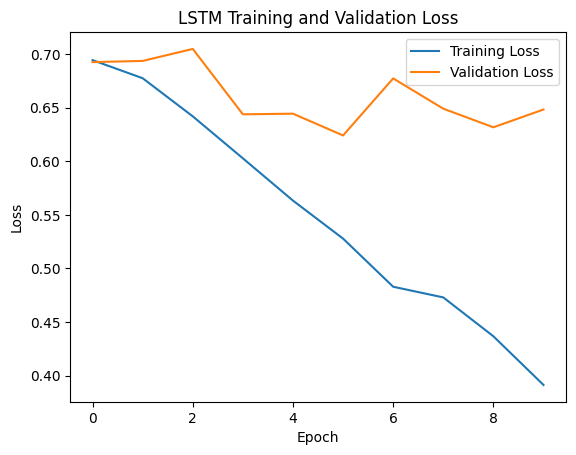

In [20]:
# Plot losses
plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.title("LSTM Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [21]:
# BEGIN TESTS
assert isinstance(train_losses, list), "train_losses should be a list"
print("✅ TEST PASSED!")
# END TESTS

# Note: There may be hidden tests that learners cannot see, as to not give away the full solution.

✅ TEST PASSED!


In [22]:
# BEGIN TESTS
assert len(train_losses) >= 10, "Should track loss for at least 10 epochs"
print("✅ TEST PASSED!")
# END TESTS

# Note: There may be hidden tests that learners cannot see, as to not give away the full solution.

✅ TEST PASSED!


In [23]:
# BEGIN TESTS
assert train_losses[-1] < train_losses[0] or abs(train_losses[-1] - train_losses[0]) < 0.1, "Training loss should generally decrease"
print("✅ TEST PASSED!")
# END TESTS

# Note: There may be hidden tests that learners cannot see, as to not give away the full solution.

✅ TEST PASSED!


## 📅 Success Checklist
- Trained LSTM-based text classifier
- Evaluated model with appropriate metrics


## 💡 Key Points
- Sequence modeling requires batching and padding
- LSTMs capture temporal dependencies in text


## 💻Exemplar Solution
After completing this activity (or if you get stuck!), take a moment to review the exemplar solution. This sample solution can offer insights into different techniques and approaches.
Reflect on what you can learn from the exemplar solution to improve your coding skills.
Remember, multiple solutions can exist for some problems; the goal is to learn and grow as a programmer by exploring various approaches.
Use the exemplar solution as a learning tool to enhance your understanding and refine your approach to coding challenges.

<details>

<summary><strong>Click HERE to see an exemplar solution</strong></summary>    
    
```python  
#########
# TASK 1
#########
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)
    
# Define model
class CustomCNN(nn.Module):
    def __init__(self):
        # SOLUTION
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 10)
        # SOLUTION

    def forward(self, x):
        # SOLUTION
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
        # SOLUTION
    
model = CustomCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
    
# Training loop
train_losses = []
for epoch in range(3):
    # SOLUTION
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_losses.append(running_loss / len(trainloader))
    print(f"Epoch {epoch+1} loss: {train_losses[-1]:.4f}")
    # SOLUTION
    
# Plot loss
plt.plot(train_losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
    
#########
# TASK 2
#########
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.datasets import IMDB
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader
from torch.cuda.amp import autocast, GradScaler
import matplotlib.pyplot as plt
import random

# Set Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Data
train_iter, test_iter = IMDB(split=('train', 'test'))

# Sample a small subset for faster training
random.seed(42)
train_data = random.sample(list(train_iter), 2000)  # (label, text)
test_data = random.sample(list(test_iter), 2000)

# Split into train/val
train_data, valid_data = train_data[:1600], train_data[1600:]

# Tokenizer
tokenizer = get_tokenizer('basic_english')

# Build vocabulary
def yield_tokens(data):
    # SOLUTION
    for idx in range(len(data)):
        label, text = data[idx]
        yield tokenizer(text)
    # SOLUTION
    
vocab = build_vocab_from_iterator(yield_tokens(train_data), specials=['<unk>', '<pad>'], max_tokens=10000)
vocab.set_default_index(vocab['<unk>'])
    
# Data pipeline
def text_pipeline(text):
    # SOLUTION
    return [vocab[token] for token in tokenizer(text)]
    # SOLUTION

def collate_batch(batch):
    # SOLUTION
    label_list, text_list, lengths = [], [], []
    for _label, _text in batch:
        label_list.append(float(_label - 1)) # Convert labels "1" → 0.0, "2" → 1.0
        processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
        text_list.append(processed_text)
        lengths.append(len(processed_text))
    label_list = torch.tensor(label_list, dtype=torch.float)
    text_list = torch.nn.utils.rnn.pad_sequence(text_list, batch_first=True, padding_value=vocab['<pad>'])
    lengths = torch.tensor(lengths)
    return text_list.to(device), label_list.to(device), lengths.to(device)
    # SOLUTION
    
# Data loaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, collate_fn=collate_batch)
valid_loader = DataLoader(valid_data, batch_size=64, shuffle=False, collate_fn=collate_batch)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False, collate_fn=collate_batch)

# LSTM Model
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_dim, output_dim):
        super().__init__()
        # SOLUTION
        self.embedding = nn.Embedding(vocab_size, emb_dim, padding_idx=vocab['<pad>'])
        self.lstm = nn.LSTM(emb_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        # SOLUTION

    def forward(self, x, lengths):
        # SOLUTION
        emb = self.embedding(x)
        packed = nn.utils.rnn.pack_padded_sequence(emb, lengths.cpu(), batch_first=True, enforce_sorted=False)
        _, (hidden, _) = self.lstm(packed)
        return self.fc(hidden[-1])
        # SOLUTION
        
model = LSTMClassifier(len(vocab), 100, 256, 1).to(device)
optimizer = optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss()

# Initialize GradScaler for AMP
scaler = GradScaler(enabled=device.type == "cuda")
    
# Training loop with AMP and gradient clipping
train_losses, valid_losses = [], []
for epoch in range(10):
    # SOLUTION
    model.train()
    running_train_loss = 0.0
    for text, labels, lengths in train_loader:
        optimizer.zero_grad()
        with autocast(enabled=device.type == "cuda"):
            outputs = model(text, lengths).squeeze(1)
            loss = criterion(outputs, labels)
        scaler.scale(loss).backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Clip gradients
        scaler.step(optimizer)
        scaler.update()
        running_train_loss += loss.item()
    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    model.eval()
    running_valid_loss = 0.0
    with torch.no_grad():
        for text, labels, lengths in valid_loader:
            with autocast(enabled=device.type == "cuda"):
                outputs = model(text, lengths).squeeze(1)
                loss = criterion(outputs, labels)
            running_valid_loss += loss.item()
    avg_valid_loss = running_valid_loss / len(valid_loader)
    valid_losses.append(avg_valid_loss)

    print(f"Epoch {epoch+1} | Train Loss: {avg_train_loss:.4f} | Valid Loss: {avg_valid_loss:.4f}")
    # SOLUTION
    
# Plot losses
plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.title("LSTM Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
```